#### Moving data in the ros2 bag to a csv file

In [13]:
from pathlib import Path

import csv

from rosbags.highlevel import AnyReader
from rosbags.typesys import Stores, get_typestore

bagpath = Path('../../datasets/pytorch_execution_time')

typestore = get_typestore(Stores.ROS2_HUMBLE)

# Create reader instance and open for reading.
with AnyReader([bagpath], default_typestore=typestore) as reader:
    connections = [x for x in reader.connections if x.topic == '/px100/pytorch_execution_time']

    csv_file = open('../../datasets/pytorch_execution_time.csv', 'w', newline='')
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['data'])
    rows = []

    for connection, timestamp, rawdata in reader.messages(connections=connections):
        msg = reader.deserialize(rawdata, connection.msgtype)
        rows.append([msg.data])
        if len(rows) >= 100:
            csv_writer.writerows(rows)
            rows = []


Writing rows
Writing rows
Writing rows
Writing rows
Writing rows
Writing rows
Writing rows


In [14]:
import pandas as pd

inference_execution_time_data = '../../datasets/pytorch_execution_time.csv'

data = pd.read_csv(inference_execution_time_data)['data']
data.info()
data.mean()

<class 'pandas.core.series.Series'>
RangeIndex: 637 entries, 0 to 636
Series name: data
Non-Null Count  Dtype  
--------------  -----  
637 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


0.15878974335321822

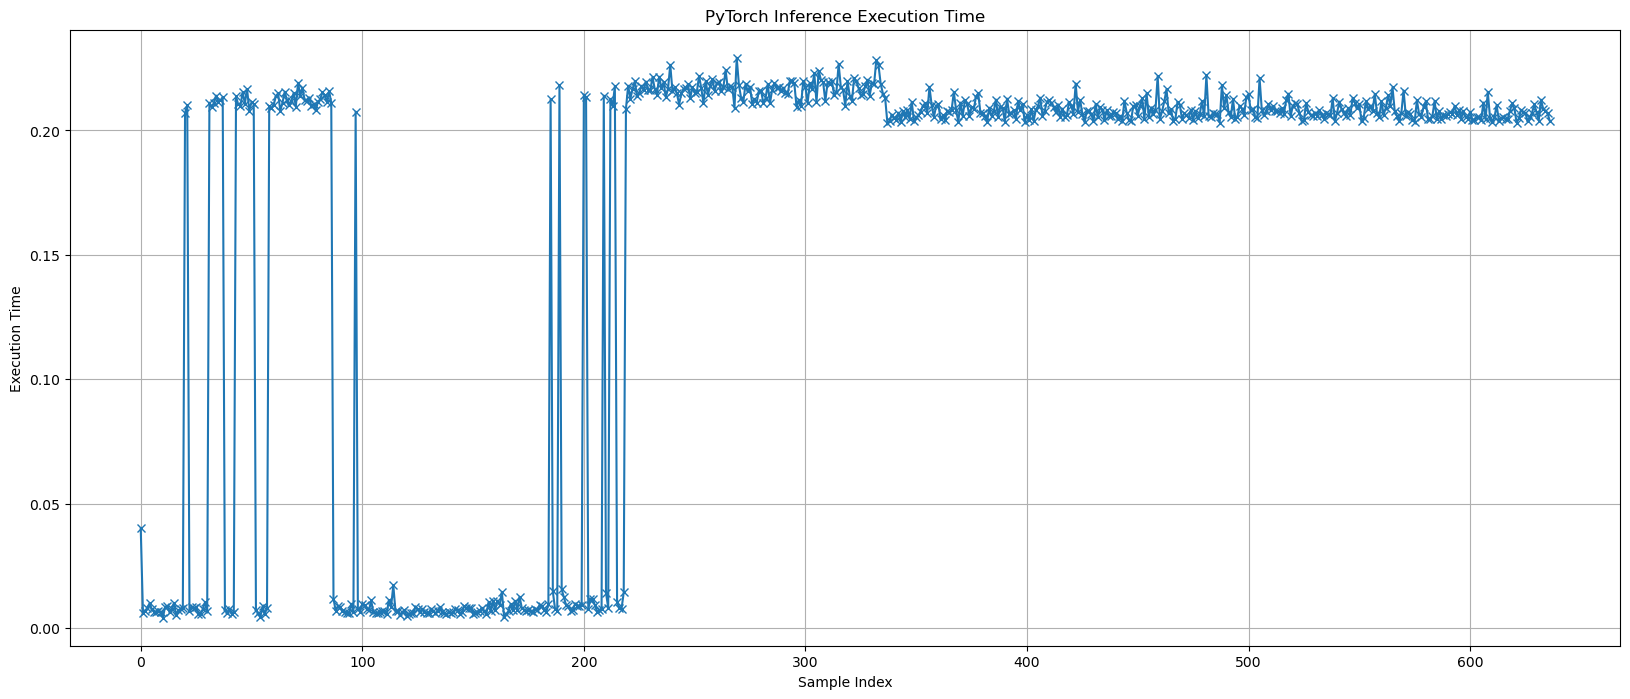

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
data.plot(kind='line', marker='x', title='PyTorch Inference Execution Time')

plt.xlabel('Sample Index')
plt.ylabel('Execution Time')
plt.grid(True)

plt.show()